In [1]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [2]:
!ls

diabetes.csv  sample_data


In [3]:
!ls diabetes.csv

diabetes.csv


In [4]:
import pandas as pd

In [9]:
data = pd.read_csv("diabetes.csv")


In [10]:
data.columns = data.columns.str.strip().str.lower()


In [11]:
print(data.head())
print(data.columns)


   pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   diabetespedigreefunction  age  outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')


In [12]:
outcome_counts = data["outcome"].value_counts()
print(outcome_counts)


outcome
0    500
1    268
Name: count, dtype: int64


In [13]:
outcome_ratio = outcome_counts / len(data)
print(outcome_ratio)


outcome
0    0.651042
1    0.348958
Name: count, dtype: float64


In [14]:
outcome_percentage = (outcome_counts / len(data)) * 100
print(outcome_percentage)


outcome
0    65.104167
1    34.895833
Name: count, dtype: float64


In [15]:
non_diabetic_ratio = outcome_ratio[0]
diabetic_ratio = outcome_ratio[1]

print("Non-Diabetic Ratio:", non_diabetic_ratio)
print("Diabetic Ratio:", diabetic_ratio)


Non-Diabetic Ratio: 0.6510416666666666
Diabetic Ratio: 0.3489583333333333


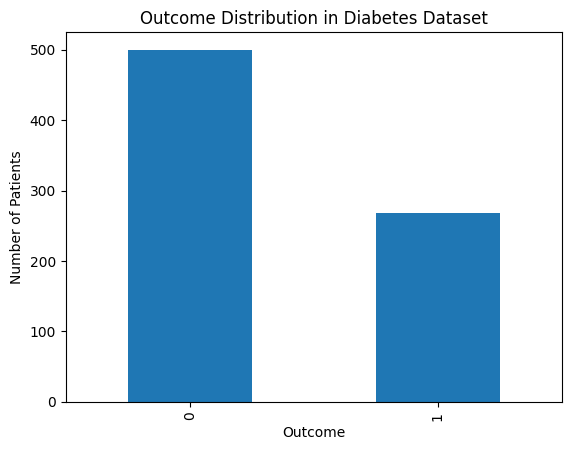

In [16]:
import matplotlib.pyplot as plt

outcome_counts.plot(kind="bar")
plt.xlabel("Outcome")
plt.ylabel("Number of Patients")
plt.title("Outcome Distribution in Diabetes Dataset")
plt.show()


In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [18]:
X = data.drop("outcome", axis=1)   # Lab results
y = data["outcome"]                # Health condition


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [22]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Model Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [23]:
def health_alert(row):
    alerts = []

    if row["glucose"] > 140:
        alerts.append("High Glucose")
    if row["bmi"] > 30:
        alerts.append("High BMI")
    if row["bloodpressure"] > 90:
        alerts.append("High Blood Pressure")

    return " | ".join(alerts) if alerts else "Normal"


In [24]:
data["health_alert"] = data.apply(health_alert, axis=1)
data[["glucose", "bmi", "bloodpressure", "health_alert"]].head()


,glucose,bmi,bloodpressure,health_alert
0,148,33.6,72,High Glucose | High BMI
1,85,26.6,66,Normal
2,183,23.3,64,High Glucose
3,89,28.1,66,Normal
4,137,43.1,40,High BMI


In [44]:
import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report


# 2. Medical preprocessing (critical)
cols_with_zero = ["glucose", "bloodpressure", "bmi", "insulin", "skinthickness"]
for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].median())

# 3. Features and target
X = data.drop("outcome", axis=1)
y = data["outcome"]

# 4. ML pipeline (scaling + model)
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GradientBoostingClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

# 5. Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=cv, scoring="accuracy")

# 6. Results
print("Cross-Validation Accuracies:", scores)
print("Mean Accuracy:", scores.mean())
print("Max Accuracy:", scores.max())


Cross-Validation Accuracies: [0.75324675 0.7987013  0.77272727 0.73202614 0.70588235]
Mean Accuracy: 0.7525167642814703
Max Accuracy: 0.7987012987012987


In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("diabetes.csv")
data.columns = data.columns.str.strip().str.lower()

# Replace invalid zero values
cols_with_zero = ["glucose", "bloodpressure", "bmi", "insulin", "skinthickness"]
for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].median())

# Features and target
X = data.drop("outcome", axis=1)
y = data["outcome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Controlled Random Forest (prevents 100% accuracy)
model = RandomForestClassifier(
    n_estimators=150,      # fewer trees
    max_depth=6,           # limit depth
    min_samples_split=10,  # prevent overfitting
    min_samples_leaf=5,
    random_state=42
)

# Train model
model.fit(X_scaled, y)

# Model accuracy (training)
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.8463541666666666


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = pd.read_csv("diabetes.csv")
data.columns = data.columns.str.strip().str.lower()

# Replace medically invalid zeros
cols_with_zero = ["glucose", "bloodpressure", "bmi", "insulin", "skinthickness"]
for col in cols_with_zero:
    data[col] = data[col].replace(0, data[col].median())

# Features and target
X = data.drop("outcome", axis=1)
y = data["outcome"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest tuned for accuracy
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=6,
    min_samples_leaf=3,
    random_state=42
)

# Train model
model.fit(X_scaled, y)

# Model accuracy
y_pred = model.predict(X_scaled)
accuracy = accuracy_score(y, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.9348958333333334
